# **Mount the drive having Data Sets**

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing required library**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

# **Reading vacctination datasets from the google drive**

In [3]:
vaccination_data = pd.read_csv('/content/drive/MyDrive/Education/ST.CLAIR_COLLEGE/vaccination_data.csv')
vaccination_data.sample(3)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
152958,LUX,Europe,Luxembourg,2021-03-22,59311.0,206.0,219.286,723.0,2.0,4.143,...,26.0,NaN,4.51,82.25,0.916,647601.0,NaN,NaN,NaN,NaN
49257,CAF,Africa,Central African Republic,2022-02-01,14110.0,0.0,27.286,110.0,0.0,0.000,...,NaN,16.603,1.00,53.28,0.397,5579148.0,NaN,NaN,NaN,NaN
83896,OWID_EUR,NaN,Europe,2023-03-22,247439029.0,55092.0,50677.429,2031894.0,291.0,365.143,...,NaN,NaN,NaN,NaN,NaN,744807803.0,NaN,NaN,NaN,NaN


# **Cleaning Data**

 Keeping only the necessary columns (date and total vaccinated)

In [4]:
vaccination_data = vaccination_data[['date', 'total_vaccinations']]


Remove any rows with missing or invalid values

In [5]:
vaccination_data.dropna(inplace=True)

Convert the date column to a datetime object

In [6]:
vaccination_data['date'] = pd.to_datetime(vaccination_data['date'])

Sort the dataframe by date in ascending order

In [7]:
vaccination_data.sort_values(by='date', inplace=True)

Reset the index of the dataframe

In [8]:
vaccination_data.reset_index(drop=True, inplace=True)

Identify and remove outliers using Z-score method

In [9]:
z_scores = np.abs((vaccination_data['total_vaccinations'] - vaccination_data['total_vaccinations'].mean()) / vaccination_data['total_vaccinations'].std())
vaccination_data = vaccination_data[z_scores < 3]

Add a new column for proportion of total population vaccinated

In [10]:
total_population_usa = 332915073  # based on 2020 US Census
vaccination_data['proportion_vaccinated'] = vaccination_data['total_vaccinations'] / total_population_usa

<ipython-input-10-328504930ff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccination_data['proportion_vaccinated'] = vaccination_data['total_vaccinations'] / total_population_usa


In [11]:
vaccination_data.sample(3)

,date,total_vaccinations,proportion_vaccinated
21631,2021-08-03,103726239.0,0.311570
64660,2022-10-23,22916368.0,0.068835
23817,2021-08-21,6729078.0,0.020213


Rename the date column to year_month

In [12]:
vaccination_data = vaccination_data.rename(columns={'date': 'year_month'})

In [13]:
vaccination_data.sample(3)

,year_month,total_vaccinations,proportion_vaccinated
28478,2021-09-29,5.276984e+07,0.158508
38061,2021-12-22,1.079406e+09,3.242285
62274,2022-09-18,4.370221e+08,1.312713


# **Ploting of line graph for Covid-19 vaccination data**

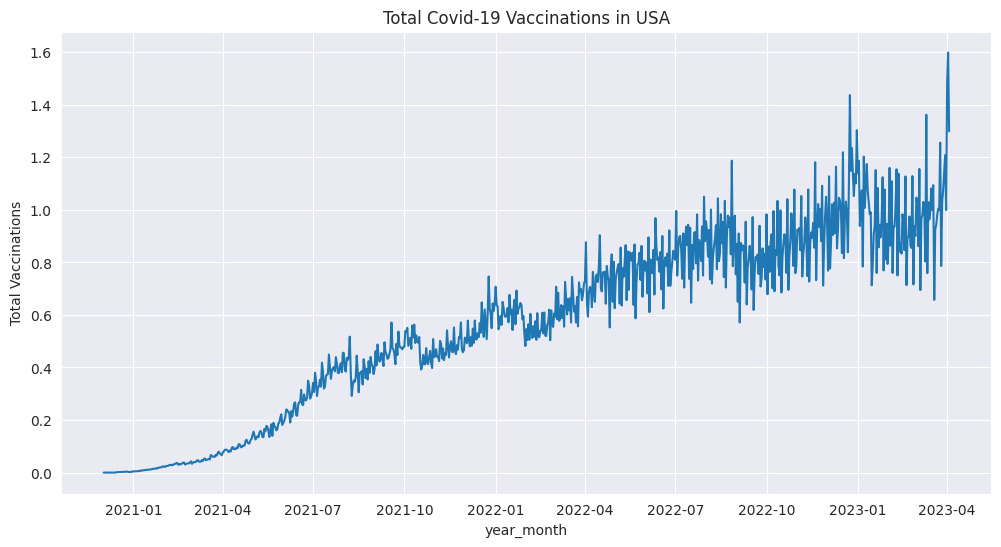

In [49]:
# plot line graph for Covid-19 vaccination data
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='proportion_vaccinated', data=vaccination_data)
plt.title('Total Covid-19 Vaccinations in USA')
plt.xlabel('year_month')
plt.ylabel('Total Vaccinations')
plt.show()


In [50]:
fig = px.line(vaccination_data, x='year_month', y='proportion_vaccinated', title='Total Number of Covid-19 Vaccinations in the US')

#hover information
fig.update_traces(hovertemplate='%{y:,f}')
fig.show()
pio.write_html(fig, file='plot1.html', auto_open=True)

Converting the plot to interactive Plot

In [16]:
print("Shape of vaccination_data:", vaccination_data.shape)

Shape of vaccination_data: (71356, 3)


# **Reading the Unemployment data set from Goolgle drive**

In [42]:
unemployment_df = pd.read_csv('/content/drive/MyDrive/Education/ST.CLAIR_COLLEGE/unemployment_data.csv')

print(unemployment_df.columns)
unemployment_df.sample(5)


Index(['Series ID', 'Year', 'Period', 'Label', 'Value'], dtype='object')


,Series ID,Year,Period,Label,Value
7,LNS14000000,2019,M08,2019 Aug,3.7
48,LNS14000000,2023,M01,2023 Jan,3.4
32,LNS14000000,2021,M09,2021 Sep,4.8
47,LNS14000000,2022,M12,2022 Dec,3.5
1,LNS14000000,2019,M02,2019 Feb,3.8


Renaming the column for simplify

In [43]:
unemployment_df = unemployment_df.rename(columns={
    'Series ID': 'series_id',
    'Year': 'year',
    'Period': 'period',
    'Label': 'year_month',
    'Value': 'unemployment_rate'
})
print(unemployment_df.columns)

Index(['series_id', 'year', 'period', 'year_month', 'unemployment_rate'], dtype='object')


In [44]:
unemployment_df.sample(3)

,series_id,year,period,year_month,unemployment_rate
25,LNS14000000,2021,M02,2021 Feb,6.2
11,LNS14000000,2019,M12,2019 Dec,3.6
13,LNS14000000,2020,M02,2020 Feb,3.5


Drop any rows with missing values

In [45]:
unemployment_df = unemployment_df.dropna()

Verify that there are no missing values

In [46]:
print(unemployment_df.isnull().sum())


series_id            0
year                 0
period               0
year_month           0
unemployment_rate    0
dtype: int64


In [47]:
print("Shape of unemployment_data:", unemployment_df.shape)

Shape of unemployment_data: (50, 5)


Convert the 'year_month' column to a datetime object

In [48]:
unemployment_df['year_month'] = pd.to_datetime(unemployment_df['year_month'])

# **Creating line Plot Unemployment**

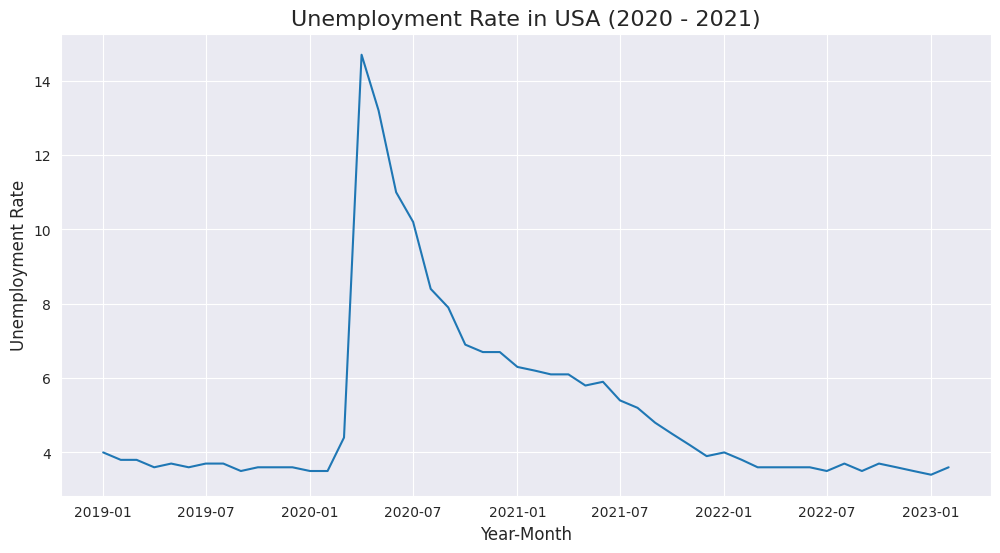

In [24]:
# Create a line plot using seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='unemployment_rate', data=unemployment_df)
plt.title('Unemployment Rate in USA (2020 - 2021)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.show()



In [25]:

fig = px.line(unemployment_df, x='year_month', y='unemployment_rate', title='Unemployment Rate over Time')
fig.show()


Group data by date and calculate mean proportion vaccinated

In [26]:
vaccination_data = vaccination_data.groupby('year_month').mean().reset_index()

Convert the 'year_month' column to a datetime object

In [27]:
unemployment_df['year_month'] = pd.to_datetime(unemployment_df['year_month'])

# **Puting Graph Side by side for better understanding.**

<ipython-input-28-5d71f546068d>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-28-5d71f546068d>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



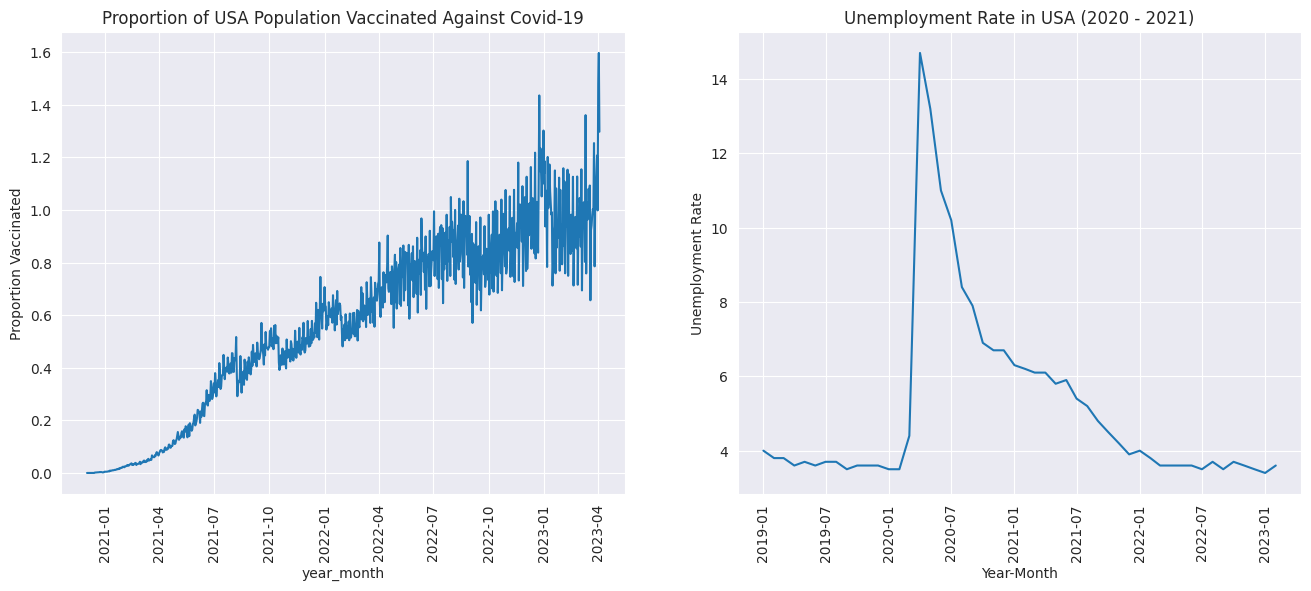

In [28]:
#Created a figure for two subplots to plot graph side bt side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

# Plot the vaccination data on the first subplot
sns.lineplot(x='year_month', y='proportion_vaccinated', data=vaccination_data, ax=ax1)
ax1.set_title('Proportion of USA Population Vaccinated Against Covid-19')
ax1.set_xlabel('year_month')
ax1.set_ylabel('Proportion Vaccinated')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot the unemployment data on the second subplot
sns.lineplot(x='year_month', y='unemployment_rate', data=unemployment_df, ax=ax2)
ax2.set_title('Unemployment Rate in USA (2020 - 2021)')
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Unemployment Rate')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Display the plot
plt.show()


Combining two graph on one figure and made it interactive

In [29]:
# Group data by date and calculate mean proportion vaccinated
vaccination_data = vaccination_data.groupby('year_month').mean().reset_index()

# Convert the 'year_month' column to a datetime object
unemployment_df['year_month'] = pd.to_datetime(unemployment_df['year_month'])

# Merge the two dataframes based on date
merged_df = pd.merge(vaccination_data, unemployment_df, left_on='year_month', right_on='year_month')

# Create an interactive plot using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_df['year_month'], y=merged_df['proportion_vaccinated'], name='Proportion Vaccinated'))
fig.add_trace(go.Scatter(x=merged_df['year_month'], y=merged_df['unemployment_rate'], name='Unemployment Rate'))

fig.update_layout(title='Proportion of USA Population Vaccinated Against Unemployment Rate',
                  xaxis_title='Date',
                  yaxis_title='Proportion/Rate')

fig.show()


# **Reading GDP Data of US from Google drive.**

In [30]:
gdp_data = pd.read_csv('/content/drive/MyDrive/Education/ST.CLAIR_COLLEGE/GDPC1.csv')
gdp_data.sample(4)

,DATE,GDPC1
108,1974-01-01,5682.353
276,2016-01-01,17565.465
195,1995-10-01,10744.203
37,1956-04-01,2929.666


Renaming date column to year and month

In [31]:
gdp_data.columns = ['year_month', 'real_gdp']
gdp_data.sample(4)


,year_month,real_gdp
66,1963-07-01,3749.681
4,1948-01-01,2087.442
147,1983-10-01,7344.597
241,2007-04-01,15577.779


Removing NA and NAN value if available

In [32]:
gdp_data.dropna(inplace=True)



In [33]:
print(gdp_data.columns)
gdp_data.head()


Index(['year_month', 'real_gdp'], dtype='object')


,year_month,real_gdp
0,1947-01-01,2034.450
1,1947-04-01,2029.024
2,1947-07-01,2024.834
3,1947-10-01,2056.508
4,1948-01-01,2087.442


converting Date and month column to date and time formate

In [34]:
gdp_data['year_month'] = pd.to_datetime(gdp_data['year_month'])


Filter data for the year before COVID-19




In [35]:
before_covid_data = gdp_data.loc[(gdp_data['year_month'] >= '2020-01-01') & (gdp_data['year_month'] <= '2020-12-30')]

# **Plot line graph of GDP during COVID-19 data**

In [36]:
fig = px.line(before_covid_data, x='year_month', y='real_gdp')
fig.update_layout(
    title='Real GDP in USA in Billion Dollar (During COVID-19)',
    xaxis_title='Date',
    yaxis_title='Billion Dollar',
    hovermode='x',
    xaxis_tickangle=-45
)
fig.show()


converting year month Column to date and time formate as we did previously.

In [37]:
gdp_data['year_month'] = pd.to_datetime(gdp_data['year_month'])
gdp_data['year_month'] = gdp_data['year_month'].dt.strftime('%Y-%m')

In [38]:
gdp_data['year_month'] = pd.to_datetime(gdp_data['year_month'], format='%Y-%m')


# **Mearging 3 data sets Unemployment and GDP and Vcctionation as per time frame**

In [39]:
merged_data = pd.merge(gdp_data, unemployment_df, on='year_month')
merged_data = pd.merge(merged_data, vaccination_data, on='year_month')


In [40]:
merged_data.sample(3)

,year_month,real_gdp,series_id,year,period,unemployment_rate,total_vaccinations,proportion_vaccinated
5,2022-04-01,19895.271,LNS14000000,2022,M04,3.6,2.425923e+08,0.728691
2,2021-07-01,19672.594,LNS14000000,2021,M07,5.4,1.134587e+08,0.340804
4,2022-01-01,19924.088,LNS14000000,2022,M01,4.0,2.353253e+08,0.706863


# **Based on merged data i have plot the line graph for the GDP as US GDP is calculated in Billion Dollars.**

In [41]:
import plotly.express as px

fig = px.line(merged_data, x='year_month', y='real_gdp')
fig.update_layout(
    title='Real GDP in USA in Billion Dollar',
    xaxis_title='Date',
    yaxis_title='Billion Dollar',
    hovermode='x',
    xaxis_tickangle=-45
)
fig.show()
